# Day 2 Project: 중고차 가격 데이터 전처리

In [39]:
import pandas as pd

car_path = "cars.csv"
brand_path = "brand.csv"

car_df = pd.read_csv(car_path)
brand_df = pd.read_csv(brand_path)

car_df.head()


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


## Step 1. cars.csv와 brand.csv 결합

In [ ]:
car_df['brand'] = car_df['title'].str.split().str[0].str.lower()

brand_df['title'] = brand_df['title'].str.lower()

merged_df = car_df.merge(brand_df, left_on='brand', right_on='title', how='left')

merged_df = merged_df.drop(columns=['title_y']).rename(columns={'title_x': 'title'})

merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom


## Step 2. 카테고리형 변수를 숫자 형태로 변환

In [ ]:
merged_df['Engine_L'] = merged_df['Engine'].astype(str).str.replace("L", "", regex=False)
merged_df['Engine_L'] = pd.to_numeric(merged_df['Engine_L'], errors='coerce')

merged_df['Emission_Class_num'] = merged_df['Emission Class'].astype(str).str.extract(r'(\d+)')
merged_df['Emission_Class_num'] = pd.to_numeric(merged_df['Emission_Class_num'], errors='coerce')

merged_df[['Engine','Engine_L','Emission Class','Emission_Class_num']].head()

,Engine,Engine_L,Emission Class,Emission_Class_num
0,1.4L,1.4,Euro 6,6.0
1,1.2L,1.2,Euro 4,4.0
2,1.4L,1.4,Euro 5,5.0
3,1.4L,1.4,Euro 4,4.0
4,1.3L,1.3,Euro 5,5.0


## Step 3. 결측치 처리

In [ ]:
merged_df['Service history'] = merged_df['Service history'].fillna("Unknown")

threshold = int(merged_df.shape[1] * 0.7)
clean_df = merged_df.dropna(thresh=threshold)

clean_df = clean_df.dropna()

print("Before:", merged_df.shape, "After:", clean_df.shape)
clean_df.isna().sum().sort_values(ascending=False).head(10)

Before: (3687, 17) After: (2239, 17)


title              0
Doors              0
Engine_L           0
country            0
brand              0
Service history    0
Emission Class     0
Seats              0
Gearbox            0
Price              0
dtype: int64

## Step 4. Scaler 적용

In [ ]:
from sklearn.preprocessing import StandardScaler

candidate_num_cols = ['Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats', 'Engine_L', 'Emission_Class_num']

num_cols = [c for c in candidate_num_cols if c in clean_df.columns]
print("Numeric columns:", num_cols)

scaler = StandardScaler()
clean_df_scaled = clean_df.copy()
clean_df_scaled[num_cols] = scaler.fit_transform(clean_df_scaled[num_cols])

clean_df_scaled[num_cols].describe().T

Numeric columns: ['Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats', 'Engine_L', 'Emission_Class_num']


,count,mean,std,min,25%,50%,75%,max
Mileage(miles),2239.0,-1.269393e-16,1.000223,-1.956148,-0.578717,-0.069140,0.520595,24.230275
Registration_Year,2239.0,-1.833004e-14,1.000223,-4.100091,-0.702569,-0.065534,0.783847,2.270262
Previous Owners,2239.0,1.269393e-16,1.000223,-1.171913,-0.522751,0.126411,0.775573,4.021384
Doors,2239.0,1.618476e-16,1.000223,-2.572146,-0.437589,0.629689,0.629689,0.629689
Seats,2239.0,-2.983074e-16,1.000223,-4.951952,0.116969,0.116969,0.116969,3.496250
Engine_L,2239.0,-5.077572e-17,1.000223,-1.720423,-0.649285,-0.006602,0.850309,10.062098
Emission_Class_num,2239.0,2.284907e-16,1.000223,-4.440340,-1.093643,0.021923,1.137488,1.137488


## Step 5. 범주형 변수 인코딩

In [ ]:
candidate_cat_cols = ['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'country']

cat_cols = [c for c in candidate_cat_cols if c in clean_df_scaled.columns]
print("Categorical columns:", cat_cols)

encoded_df = pd.get_dummies(clean_df_scaled, columns=cat_cols, drop_first=True)

encoded_df.head()

Categorical columns: ['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand', 'country']


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Engine_L,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,SKODA FABIA,6900,-0.300575,0.783847,0.126411,1.4L,0.629689,0.116969,Euro 6,-0.435057,...,False,False,False,False,False,False,False,False,False,False
1,VAUXHALL CORSA,1495,0.133375,-0.914914,0.775573,1.2L,-1.504867,0.116969,Euro 4,-0.863513,...,False,False,False,False,False,False,False,False,True,False
3,MINI HATCH,2395,0.325534,-0.490224,1.424735,1.4L,-1.504867,-1.572671,Euro 4,-0.435057,...,False,False,False,False,False,False,False,False,True,False
5,HYUNDAI COUPE,800,0.973416,-1.127260,0.126411,2.0L,-1.504867,-1.572671,Euro 4,0.850309,...,False,False,False,False,False,True,False,False,False,False
9,PEUGEOT 207,1299,0.095986,-0.914914,1.424735,1.6L,0.629689,0.116969,Euro 4,-0.006602,...,False,False,False,False,False,False,False,False,False,False


## Step 6. PCA로 70% 이상 설명력 확보

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

target_col = "Price" if "Price" in encoded_df.columns else None

drop_cols = ["title"]
if target_col:
    drop_cols.append(target_col)

X = encoded_df.drop(columns=[c for c in drop_cols if c in encoded_df.columns])

X = X.select_dtypes(include=[np.number])

pca = PCA(n_components=0.7, random_state=42)
X_pca = pca.fit_transform(X)

print("선택된 주성분 개수:", pca.n_components_)
print("설명력(누적 분산 비율):", float(pca.explained_variance_ratio_.sum()))


선택된 주성분 개수: 3
설명력(누적 분산 비율): 0.7425257717566136


##  (추가)국가별 총 브랜드 개수

In [35]:
brand_count_by_country = brand_df.groupby("country")["title"].nunique().sort_values(ascending=False)
brand_count_by_country

country
Japan             11
United Kingdom     8
Germany            6
United States      5
France             4
Italy              4
South Korea        4
Sweden             2
Czech Republic     1
Malaysia           1
Romania            1
Spain              1
Name: title, dtype: int64

## (추가)상관관계 확인

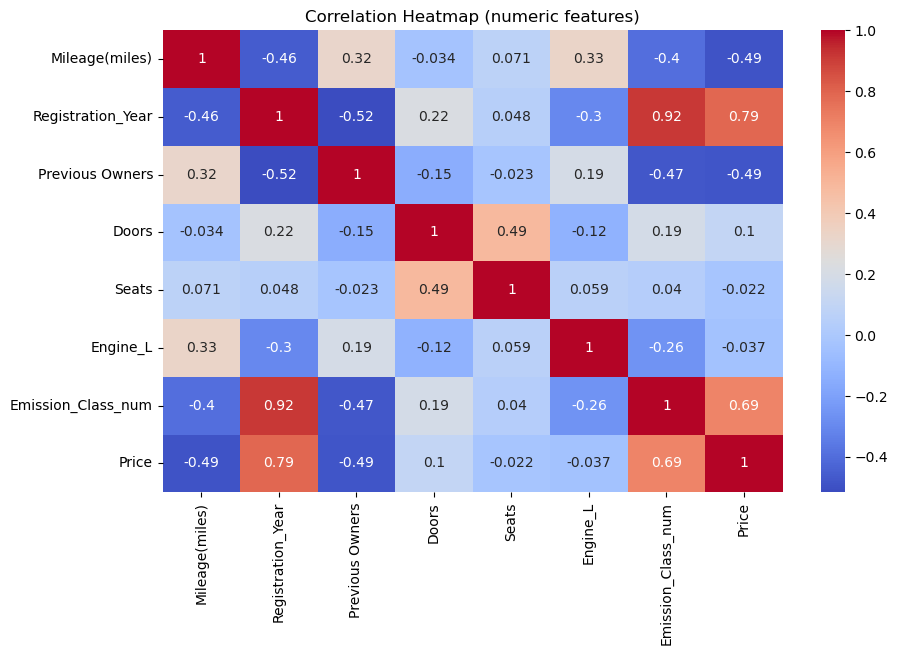

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_cols = num_cols.copy()
if 'Price' in clean_df.columns:
    corr_cols.append('Price')

corr_df = clean_df[corr_cols].copy()

plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (numeric features)")
plt.show()
